# TASK 3

#### IRIS_notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'IRIS.csv'
df = pd.read_csv(path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.describe(include='object')

,species
count,150
unique,3
top,Iris-setosa
freq,50


In [6]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

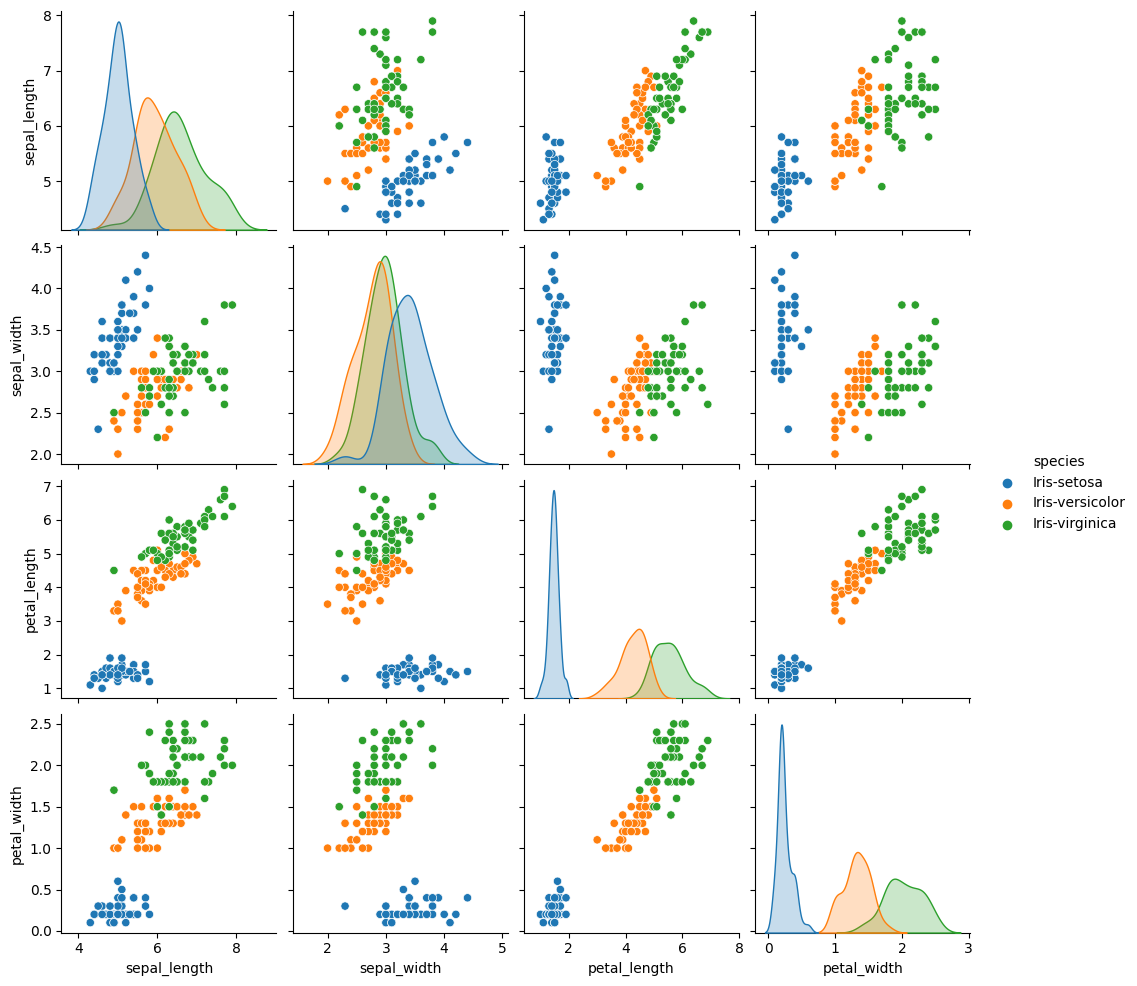

In [7]:
sns.pairplot(df, hue="species")
plt.show()

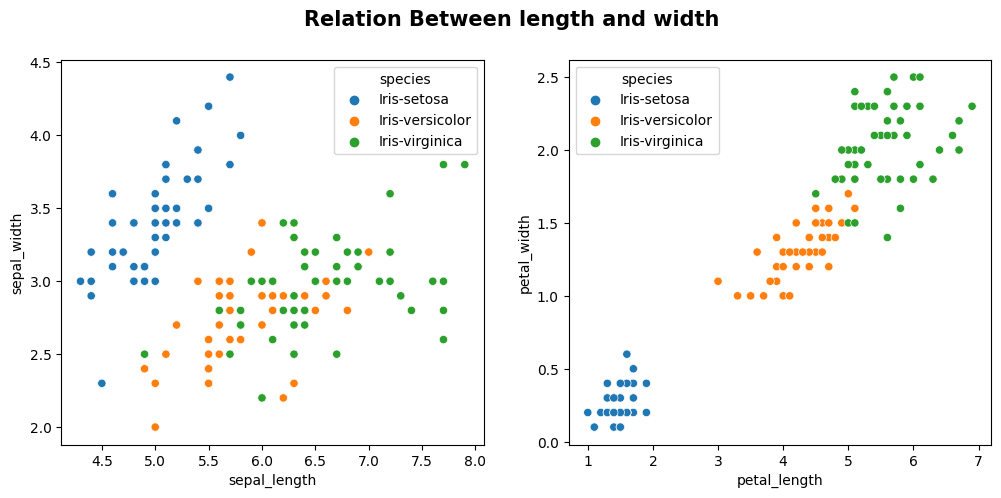

In [8]:
fig = plt.figure(figsize=(12, 5))
gs  = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

fig.suptitle(t='Relation Between length and width', fontweight ="bold",fontsize=15)

sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', ax=ax1)
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', ax=ax2)

plt.show()

# Building Machine Learning Model

### Clustering

In [9]:
# split data and score model
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

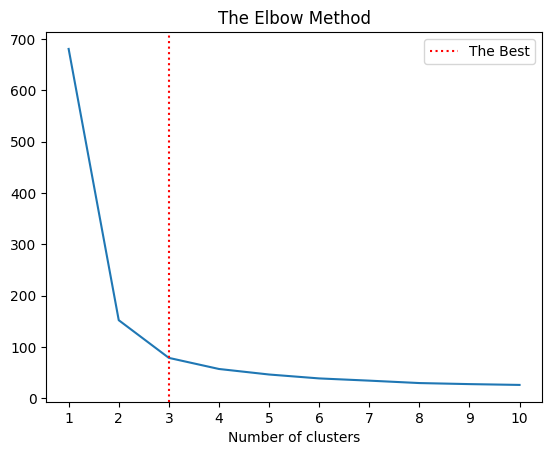

In [10]:
X = df.drop('species', axis=1)
num_of_clusters = range(1, 11)
iners = []


for i in num_of_clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    iners.append(kmeans.inertia_)

    
plt.plot(num_of_clusters, iners)
plt.axvline(3, linestyle=':', color='r',label='The Best')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(range(1, 11))
plt.legend()
plt.show()

In [11]:
X = df.drop('species', axis=1)
y = df['species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica': 2})

kmeans = KMeans(n_clusters=3, random_state=2)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
correct_labels = sum(y == labels)

print(f"Result: {correct_labels} out of {y.size} samples were correctly labeled.")
print('Accuracy score: ', (correct_labels/float(y.size)))

Result: 134 out of 150 samples were correctly labeled.
Accuracy score:  0.8933333333333333


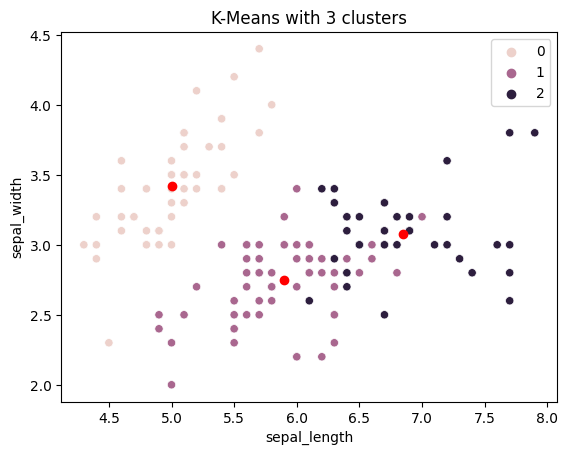

In [12]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue=labels)
plt.scatter(centroids[:,0], centroids[:,1], color = 'r')
plt.title('K-Means with 3 clusters')
plt.show()

### Logistic Regression Model..

In [13]:
X = df.drop('species', axis=1)
y = df['species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica': 2})

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LogisticRegression().fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(f'Train Score: {lr.score(x_train, y_train)*100:.2f}%')
print( f'Model score: {lr.score(x_test, y_test)*100:.2f}%')

Train Score: 98.10%
Model score: 97.78%


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



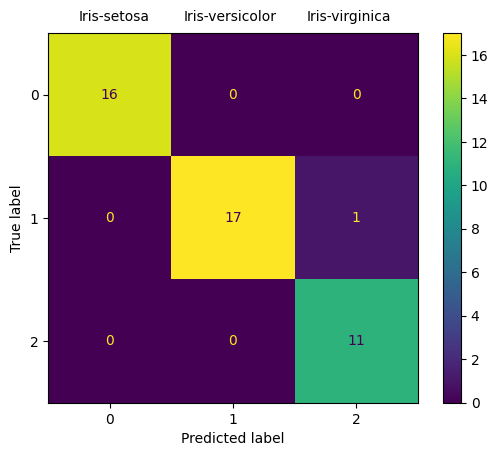

In [16]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.text(x=-0.25, y=-0.6, s='Iris-setosa')
plt.text(x=0.6, y=-0.6, s='Iris-versicolor')
plt.text(x=1.6, y=-0.6, s='Iris-virginica')
plt.show()